In [13]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import pmdarima

from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.graphics.api import qqplot

In [155]:
!pip install pmdarima

In [2]:
pd.read_csv(r'Load Survey 01.csv')

,Date,Interval Start,Interval End,Active(I),Active(E),Reactive(I)-Active(I),Reactive(E)-Active(I),Reactive(E)-Active(E),Reactive(I)-Active(E),Apparent-Active(I) - type 2,Apparent-Active(E) - type 6,Average Voltage,Frequency,Calculated Avg Imp Power Factor (signed),Calculated Avg Exp Power Factor (signed)
0,20-10-2021,00:00,00:15,0,86531.25,0,0,0,25187.50,0,90156.25,427420,50.00,1,-0.960
1,20-10-2021,00:15,00:30,0,85718.75,0,0,0,25375.00,0,89375.00,427480,50.01,1,-0.959
2,20-10-2021,00:30,00:45,0,86062.50,0,0,0,25156.25,0,89687.50,427340,49.98,1,-0.960
3,20-10-2021,00:45,01:00,0,87781.25,0,0,0,24812.50,0,91218.75,427200,50.01,1,-0.962
4,20-10-2021,01:00,01:15,0,87406.25,0,0,0,25218.75,0,90968.75,427440,50.00,1,-0.961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4283,03-12-2021,14:45,15:00,0,72062.50,0,0,0,26906.25,0,76937.50,425120,50.00,1,-0.937
4284,03-12-2021,15:00,15:15,0,73093.75,0,0,0,27156.25,0,77968.75,425340,49.99,1,-0.937
4285,03-12-2021,15:15,15:30,0,74218.75,0,0,0,26156.25,0,78687.50,424740,49.92,1,-0.943
4286,03-12-2021,15:30,15:45,0,74687.50,0,0,0,26343.75,0,79218.75,424900,49.97,1,-0.943


In [3]:
pd.read_csv(r'Load Survey02.csv')

,Date,Interval Start,Interval End,Active(I),Active(E),Reactive(I)-Active(I),Reactive(E)-Active(I),Reactive(E)-Active(E),Reactive(I)-Active(E),Apparent-Active(I) - type 2,Apparent-Active(E) - type 6,Average Voltage,Frequency,Calculated Avg Imp Power Factor (signed),Calculated Avg Exp Power Factor (signed),Low Voltage
0,03-12-2021,16:00,16:15,0,77468.75,0.0,0,0,27218.75,0.0,82125.00,425280,50.07,1,-0.943,No
1,03-12-2021,16:15,16:30,0,80000.00,0.0,0,0,25875.00,0.0,84093.75,423780,50.03,1,-0.951,No
2,03-12-2021,16:30,16:45,0,82375.00,0.0,0,0,24187.50,0.0,85875.00,422800,49.99,1,-0.959,No
3,03-12-2021,16:45,17:00,0,82218.75,0.0,0,0,24500.00,0.0,85781.25,423000,49.98,1,-0.958,No
4,03-12-2021,17:00,17:15,0,82125.00,0.0,0,0,24875.00,0.0,85781.25,423120,49.95,1,-0.957,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2957,03-01-2022,11:15,11:30,0,88000.00,0.0,0,0,19062.50,0.0,90000.00,420000,50,1,-0.978,No
2958,03-01-2022,11:30,11:45,0,87656.25,0.0,0,0,19250.00,0.0,89750.00,420260,50.02,1,-0.977,No
2959,03-01-2022,11:45,12:00,0,87562.50,0.0,0,0,19281.25,0.0,89656.25,420460,50,1,-0.977,No
2960,03-01-2022,12:00,12:15,0,89781.25,0.0,0,0,19875.00,0.0,91968.75,420760,49.99,1,-0.976,No


In [4]:
pd.read_csv(r'Load Survey 03.csv')

,Date,Interval Start,Interval End,Active(I),Active(E),Reactive(I)-Active(I),Reactive(E)-Active(I),Reactive(E)-Active(E),Reactive(I)-Active(E),Apparent-Active(I) - type 2,Apparent-Active(E) - type 6,Average Voltage,Frequency,Calculated Avg Imp Power Factor (signed),Calculated Avg Exp Power Factor (signed)
0,03-01-2022,12:30,12:45,0,91687.50,0,0,0,19093.75,0,93656.25,420040,49.88,1,-0.979
1,03-01-2022,12:45,13:00,0,90781.25,0,0,0,20562.50,0,93093.75,420840,49.97,1,-0.975
2,03-01-2022,13:00,13:15,0,91437.50,0,0,0,21781.25,0,94000.00,421460,49.97,1,-0.973
3,03-01-2022,13:15,13:30,0,92218.75,0,0,0,21750.00,0,94781.25,421580,49.99,1,-0.973
4,03-01-2022,13:30,13:45,0,92656.25,0,0,0,21250.00,0,95062.50,421280,49.97,1,-0.975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3833,12-02-2022,10:45,11:00,0,89562.50,0,0,0,17281.25,0,91218.75,417320,50.04,1,-0.982
3834,12-02-2022,11:00,11:15,0,88718.75,0,0,0,18531.25,0,90625.00,417600,50.00,1,-0.979
3835,12-02-2022,11:15,11:30,0,89843.75,0,0,0,18281.25,0,91687.50,417560,50.00,1,-0.980
3836,12-02-2022,11:30,11:45,0,90156.25,0,0,0,18156.25,0,91937.50,417600,49.96,1,-0.981


In [5]:
pd.read_csv(r'Load Survey 04.csv')

,Date,Interval Start,Interval End,Active(I),Active(E),Reactive(I)-Active(I),Reactive(E)-Active(I),Reactive(E)-Active(E),Reactive(I)-Active(E),Apparent-Active(I) - type 2,Apparent-Active(E) - type 6,Average Voltage,Frequency,Calculated Avg Imp Power Factor (signed),Calculated Avg Exp Power Factor (signed),Low Voltage
0,12-02-2022,12:00,12:15,0,91781.25,0,0,0,18625.00,0,93625.00,418120,49.95,1,-0.980,No
1,12-02-2022,12:15,12:30,0,91687.50,0,0,0,17781.25,0,93406.25,417680,49.89,1,-0.982,No
2,12-02-2022,12:30,12:45,0,91250.00,0,0,0,18656.25,0,93156.25,418060,49.92,1,-0.980,No
3,12-02-2022,12:45,13:00,0,91093.75,0,0,0,19968.75,0,93250.00,418800,50.01,1,-0.977,No
4,12-02-2022,13:00,13:15,0,90281.25,0,0,0,22875.00,0,93156.25,420160,50.04,1,-0.969,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2297,08-03-2022,10:15,10:30,0,70187.50,0,0,0,7187.50,0,70593.75,416460,49.99,1,-0.994,No
2298,08-03-2022,10:30,10:45,0,69375.00,0,0,0,7187.50,0,69750.00,416460,49.9,1,-0.995,No
2299,08-03-2022,10:45,11:00,0,67906.25,0,0,0,8375.00,0,68406.25,417080,49.98,1,-0.993,No
2300,08-03-2022,11:00,11:15,0,67593.75,0,0,0,8437.50,0,68125.00,417380,50,1,-0.992,No


In [6]:
df = pd.concat(map(pd.read_csv,['Load Survey 01.csv', 'Load Survey02.csv','Load Survey 03.csv','Load Survey 04.csv']), ignore_index=True)
df

,Date,Interval Start,Interval End,Active(I),Active(E),Reactive(I)-Active(I),Reactive(E)-Active(I),Reactive(E)-Active(E),Reactive(I)-Active(E),Apparent-Active(I) - type 2,Apparent-Active(E) - type 6,Average Voltage,Frequency,Calculated Avg Imp Power Factor (signed),Calculated Avg Exp Power Factor (signed),Low Voltage
0,20-10-2021,00:00,00:15,0,86531.25,0.0,0,0,25187.50,0.0,90156.25,427420,50.0,1,-0.960,NaN
1,20-10-2021,00:15,00:30,0,85718.75,0.0,0,0,25375.00,0.0,89375.00,427480,50.01,1,-0.959,NaN
2,20-10-2021,00:30,00:45,0,86062.50,0.0,0,0,25156.25,0.0,89687.50,427340,49.98,1,-0.960,NaN
3,20-10-2021,00:45,01:00,0,87781.25,0.0,0,0,24812.50,0.0,91218.75,427200,50.01,1,-0.962,NaN
4,20-10-2021,01:00,01:15,0,87406.25,0.0,0,0,25218.75,0.0,90968.75,427440,50.0,1,-0.961,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13385,08-03-2022,10:15,10:30,0,70187.50,0.0,0,0,7187.50,0.0,70593.75,416460,49.99,1,-0.994,No
13386,08-03-2022,10:30,10:45,0,69375.00,0.0,0,0,7187.50,0.0,69750.00,416460,49.9,1,-0.995,No
13387,08-03-2022,10:45,11:00,0,67906.25,0.0,0,0,8375.00,0.0,68406.25,417080,49.98,1,-0.993,No
13388,08-03-2022,11:00,11:15,0,67593.75,0.0,0,0,8437.50,0.0,68125.00,417380,50,1,-0.992,No


In [7]:
df["Date_time"] = pd.to_datetime(df["Date"] + " " + df["Interval Start"])
df

,Date,Interval Start,Interval End,Active(I),Active(E),Reactive(I)-Active(I),Reactive(E)-Active(I),Reactive(E)-Active(E),Reactive(I)-Active(E),Apparent-Active(I) - type 2,Apparent-Active(E) - type 6,Average Voltage,Frequency,Calculated Avg Imp Power Factor (signed),Calculated Avg Exp Power Factor (signed),Low Voltage,Date_time
0,20-10-2021,00:00,00:15,0,86531.25,0.0,0,0,25187.50,0.0,90156.25,427420,50.0,1,-0.960,NaN,2021-10-20 00:00:00
1,20-10-2021,00:15,00:30,0,85718.75,0.0,0,0,25375.00,0.0,89375.00,427480,50.01,1,-0.959,NaN,2021-10-20 00:15:00
2,20-10-2021,00:30,00:45,0,86062.50,0.0,0,0,25156.25,0.0,89687.50,427340,49.98,1,-0.960,NaN,2021-10-20 00:30:00
3,20-10-2021,00:45,01:00,0,87781.25,0.0,0,0,24812.50,0.0,91218.75,427200,50.01,1,-0.962,NaN,2021-10-20 00:45:00
4,20-10-2021,01:00,01:15,0,87406.25,0.0,0,0,25218.75,0.0,90968.75,427440,50.0,1,-0.961,NaN,2021-10-20 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13385,08-03-2022,10:15,10:30,0,70187.50,0.0,0,0,7187.50,0.0,70593.75,416460,49.99,1,-0.994,No,2022-08-03 10:15:00
13386,08-03-2022,10:30,10:45,0,69375.00,0.0,0,0,7187.50,0.0,69750.00,416460,49.9,1,-0.995,No,2022-08-03 10:30:00
13387,08-03-2022,10:45,11:00,0,67906.25,0.0,0,0,8375.00,0.0,68406.25,417080,49.98,1,-0.993,No,2022-08-03 10:45:00
13388,08-03-2022,11:00,11:15,0,67593.75,0.0,0,0,8437.50,0.0,68125.00,417380,50,1,-0.992,No,2022-08-03 11:00:00


In [8]:
df = df[['Date_time','Frequency']]
df

,Date_time,Frequency
0,2021-10-20 00:00:00,50.0
1,2021-10-20 00:15:00,50.01
2,2021-10-20 00:30:00,49.98
3,2021-10-20 00:45:00,50.01
4,2021-10-20 01:00:00,50.0
...,...,...
13385,2022-08-03 10:15:00,49.99
13386,2022-08-03 10:30:00,49.9
13387,2022-08-03 10:45:00,49.98
13388,2022-08-03 11:00:00,50


<AxesSubplot:xlabel='Date_time', ylabel='Frequency'>

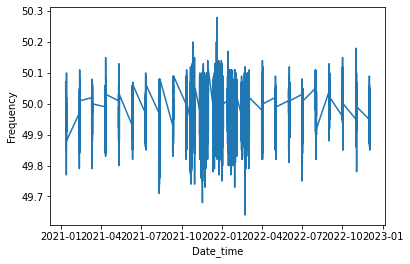

In [15]:
sns.lineplot(x=df['Date_time'],y=df['Frequency'])

In [9]:
df['Frequency'] = df['Frequency'].apply(lambda x: pd.to_numeric(str(x).strip("'"), errors='coerce'))

In [276]:
df['Frequency']=df['Frequency'].astype(float)

In [277]:
df['Frequency']=df['Frequency'].fillna(50.00)

In [278]:
df=df.set_index('Date_time')

In [279]:
df

,Frequency
Date_time,
2021-10-20 00:00:00,50.00
2021-10-20 00:15:00,50.01
2021-10-20 00:30:00,49.98
2021-10-20 00:45:00,50.01
2021-10-20 01:00:00,50.00
...,...
2022-08-03 10:15:00,49.99
2022-08-03 10:30:00,49.90
2022-08-03 10:45:00,49.98


In [267]:
df=df.set_index('Date_time').asfreq(freq='Frequency' ,method=None, how=None, normalize=False, fill_value=None)

ValueError: Invalid frequency: Frequency

In [280]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df, model='ad')

from pylab import rcParams
rcParams['figure.figsize'] = 12,5
result.plot()

ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None

In [186]:
df['Frequency'].unique()

array([50.07, 50.02, 49.95, 49.96, 49.92, 50.03, 50.  , 49.9 , 49.88,
       50.01, 50.06, 49.99, 49.98, 49.97, 49.93, 49.85, 50.04, 49.91,
         nan, 49.94, 49.89, 50.05, 50.11, 49.86, 49.82, 50.08, 49.81,
       50.13, 50.1 , 50.12, 49.87, 49.84, 50.09, 49.8 , 49.83, 49.79,
       50.2 , 50.14, 50.15, 50.28, 49.77, 50.17, 49.69, 50.18])

In [235]:
df.isnull().sum()

Frequency    0
dtype: int64

In [236]:
df.dtypes

Frequency    float64
dtype: object

In [73]:
df

,Frequency
Date_time,
2021-10-20 00:00:00,50.00
2021-10-20 00:15:00,50.01
2021-10-20 00:30:00,49.98
2021-10-20 00:45:00,50.01
2021-10-20 01:00:00,50.00
...,...
2022-08-03 10:15:00,49.99
2022-08-03 10:30:00,49.90
2022-08-03 10:45:00,49.98


<AxesSubplot:xlabel='Date_time'>

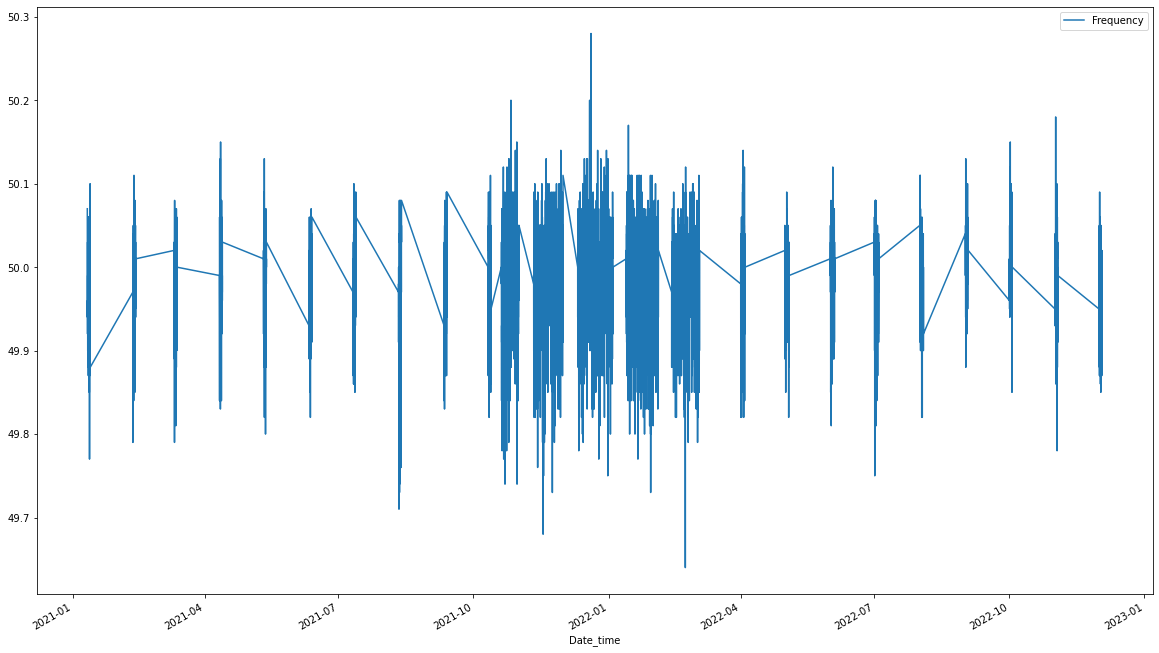

In [237]:
df.plot(figsize=(20, 12))

In [75]:
df.loc['2021-10-20 00:00:00':'2021-10-20 23:45:00']['Frequency'].mean()

49.997500000000024

In [76]:
df['2021-10-20 00:00:00':'2021-10-20 23:45:00']['Frequency'].mean()

49.997500000000024

In [285]:
sdf1 = df.tail(300)

<AxesSubplot:xlabel='Date_time'>

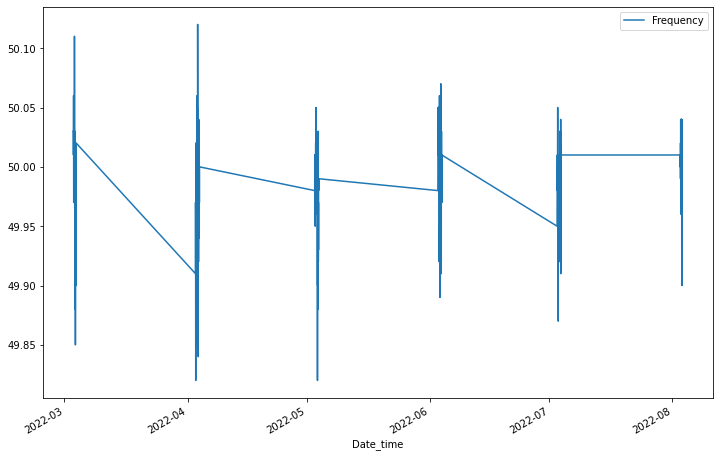

In [286]:
df1.plot(figsize=(12,8))

In [283]:
df

,Frequency
Date_time,
2021-10-20 00:00:00,50.00
2021-10-20 00:15:00,50.01
2021-10-20 00:30:00,49.98
2021-10-20 00:45:00,50.01
2021-10-20 01:00:00,50.00
...,...
2022-08-03 10:15:00,49.99
2022-08-03 10:30:00,49.90
2022-08-03 10:45:00,49.98


In [284]:
df.dtypes

Frequency    float64
dtype: object

In [282]:
decomposition = sm.tsa.seasonal_decompose(df,model='additive')
fig = decomposition.plot()
plt.show()

ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None

In [1]:
!pip install jupyter_to_medium

^C


In [ ]:
from pmdarima import auto_arima
auto_arima(train,m=12,start_p = 0, seasonal = True,d=1,trace = True,error_action='ignore',suppress_warnings=True,stepwise=True)